In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'[^a-z0-9_]', ' ', regex=True).str.strip().str.replace(' ', '_')
    return df

def value_counts_with_percentage(df, column, top_n=10):
    counts = df[column].value_counts()
    percent = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percent.round(2)})
    return summary.head(top_n)

In [8]:
# Load 5% of the dataset as it is too large to process in one go
import random
df = pd.read_csv('../data/exported_data.csv', dtype=str, skiprows=lambda i: i > 0 and random.random() > 0.05)

| Column                  | Description                                                                                     |
|-------------------------|-------------------------------------------------------------------------------------------------|
| `event_date`            | The date the event occurred, in `YYYYMMDD` format (e.g., `20201101`).                          |
| `event_timestamp`       | The precise timestamp of the event in microseconds since epoch.                                |
| `event_name`            | The type of event triggered by the user (e.g., `page_view`, `purchase`, `add_to_cart`).        |
| `user_pseudo_id`        | An anonymized unique identifier for a user.                                                     |
| `traffic_source`        | The name of the source that referred the user (e.g., `google`, `newsletter`).                  |
| `traffic_medium`        | The marketing medium (e.g., `organic`, `email`, `cpc`).                                         |
| `traffic_name`          | The name of the marketing campaign or traffic source.                                           |
| `geo_country`           | The country from which the user interacted.                                                     |
| `device_category`       | The type of device used (e.g., `mobile`, `desktop`).                                            |
| `device_os`             | The operating system of the user's device (e.g., `iOS`, `Android`).                             |
| `browser`               | The browser used by the user (e.g., `Chrome`, `Safari`).                                        |
| `transaction_id`        | The unique ID associated with an eCommerce transaction.                                         |
| `total_revenue_usd`     | Total revenue (in USD) associated with the transaction.                                         |
| `total_items`           | Total number of items involved in the transaction.                                              |
| `param_key`             | The name of the event parameter (e.g., `item_id`, `value`, `currency`).                        |
| `param_value`           | The value of the event parameter, cast to string if necessary.                                  |
| `item_id`               | The unique ID of the item involved in the event.                                                |
| `item_name`             | The name of the item involved in the event.                                                     |
| `item_price_usd`        | The price of the item (in USD) for the event (e.g., purchase or add to cart).                  |
| `item_quantity`         | The quantity of the item involved in the event.                                                 |


In [9]:
df = clean_columns(df)
df.head()

,event_date,event_timestamp,event_name,user_pseudo_id,traffic_source,traffic_medium,traffic_name,geo_country,device_category,device_os,browser,transaction_id,total_revenue_usd,total_items,param_key,param_value,item_id,item_name,item_price_usd,item_quantity
0,20201122,1606010731385515,view_item,92153653.4505892393,shop.googlemerchandisestore.com,referral,(referral),United States,desktop,Macintosh,Chrome,(not set),NaN,NaN,ga_session_number,1,GGOEGDHC098299,Google 24oz Ring Bottle Blue,NaN,NaN
1,20201124,1606233601131649,view_item,1669048.7348890098,shop.googlemerchandisestore.com,referral,(referral),Japan,mobile,Web,Chrome,(not set),NaN,NaN,page_referrer,NaN,GGOEGDHJ116899,Google Glass Bottle,NaN,NaN
2,20201124,1606243029695055,view_item,2835172.7364314428,shop.googlemerchandisestore.com,referral,(referral),United States,mobile,Web,Chrome,(not set),NaN,NaN,engagement_time_msec,4757,GGOEAHPL130910,Android Iconic Hat Green,NaN,NaN
3,20201124,1606259695838660,view_item,3524756.2612834429,google,organic,(organic),United States,mobile,Web,Safari,(not set),NaN,NaN,clean_event,gtm.js,GGOEGCKB140599,Google NYC Campus Sticker,NaN,NaN
4,20201124,1606198290115567,view_item,3817511.9866467352,shop.googlemerchandisestore.com,referral,(referral),Morocco,desktop,Web,Chrome,(not set),NaN,NaN,page_title,Men's / Unisex | Apparel | Google Merchandise ...,GGOEGXXX1344,Google Navy Speckled Tee,NaN,NaN


In [10]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # show first 10 unique values
    print("-" * 40)

event_date: 92 unique values
['20201122' '20201124' '20201127' '20201116' '20201117' '20201120'
 '20201114' '20201118' '20201113' '20201105']
----------------------------------------
event_timestamp: 881087 unique values
['1606010731385515' '1606233601131649' '1606243029695055'
 '1606259695838660' '1606198290115567' '1606514101770892'
 '1606473587147789' '1606473846650492' '1606495113443110'
 '1606488362721646']
----------------------------------------
event_name: 4 unique values
['view_item' 'add_to_cart' 'page_view' 'purchase']
----------------------------------------
user_pseudo_id: 195195 unique values
['92153653.4505892393' '1669048.7348890098' '2835172.7364314428'
 '3524756.2612834429' '3817511.9866467352' '7252675.9081491443'
 '7732574.6197429253' '7962702.0979733348' '7970363.0321929359'
 '10489887.5646596416']
----------------------------------------
traffic_source: 5 unique values
['shop.googlemerchandisestore.com' 'google' '<Other>' '(direct)'
 '(data deleted)']
------------

In [27]:
missing_count = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percent
}).sort_values("Missing %", ascending=False)

print(missing_df)

                   Missing Count  Missing %
item_price_usd           2692255      99.49
total_revenue_usd        2691970      99.48
item_quantity            2661877      98.37
total_items              2349774      86.83
item_id                   821736      30.37
item_name                 821736      30.37
transaction_id            763049      28.20
param_value               319927      11.82
user_pseudo_id                 0       0.00
event_name                     0       0.00
event_timestamp                0       0.00
event_date                     0       0.00
browser                        0       0.00
device_os                      0       0.00
device_category                0       0.00
geo_country                    0       0.00
traffic_medium                 0       0.00
traffic_name                   0       0.00
traffic_source                 0       0.00
param_key                      0       0.00


In [ ]:
value_counts_with_percentage(df, 'geo_country')

,Count,Percentage
geo_country,,
United States,1214368,44.88
India,244851,9.05
Canada,205961,7.61
United Kingdom,83533,3.09
Spain,51026,1.89
France,50620,1.87
China,47083,1.74
Taiwan,44778,1.65
Germany,43913,1.62


In [19]:
traffic_combo = pd.crosstab(df['traffic_source'], df['traffic_medium'], normalize='index') * 100
traffic_combo.round(2)


traffic_medium,(data deleted),(none),<Other>,cpc,organic,referral
traffic_source,,,,,,
(data deleted),99.97,0.0,0.00,0.00,0.00,0.03
(direct),0.00,100.0,0.00,0.00,0.00,0.00
<Other>,0.57,0.0,51.33,0.02,10.06,38.02
google,0.00,0.0,0.00,11.49,88.51,0.00
shop.googlemerchandisestore.com,0.00,0.0,0.00,0.00,0.00,100.00


In [28]:
value_counts_with_percentage(df, 'device_category')

,Count,Percentage
device_category,,
desktop,1572695,58.12
mobile,1075036,39.73
tablet,58298,2.15


In [29]:

value_counts_with_percentage(df, 'browser')

,Count,Percentage
browser,,
Chrome,1849943,68.36
Safari,643336,23.77
<Other>,73358,2.71
Edge,57974,2.14
Firefox,47113,1.74
Android Webview,34305,1.27


In [30]:

value_counts_with_percentage(df, 'item_name')


,Count,Percentage
item_name,,
Google Navy Speckled Tee,39519,2.10
Super G Unisex Joggers,35803,1.90
Google Zip Hoodie F/C,34978,1.86
Google Campus Bike Eco Tee Navy,30470,1.62
Google Women's Striped L/S,29935,1.59
Android Large Removable Sticker Sheet,26876,1.43
Android SM S/F18 Sticker Sheet,26663,1.42
Google Badge Heavyweight Pullover Black,24988,1.33
Google F/C Long Sleeve Tee Charcoal,24715,1.31


In [31]:
value_counts_with_percentage(df, 'event_name')


,Count,Percentage
event_name,,
view_item,1592762,58.86
page_view,747869,27.64
add_to_cart,351339,12.98
purchase,14059,0.52


In [32]:
df['user_pseudo_id'].nunique()

195195

In [44]:
df['datetime'] = pd.to_datetime(df['event_timestamp'].astype(int) / 1_000_000, unit='s')
df['event_hour'] = df['datetime'].dt.floor('H')

/tmp/ipykernel_17716/4067280625.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['event_hour'] = df['datetime'].dt.floor('H')


In [52]:
df.head()

,event_date,event_timestamp,event_name,user_pseudo_id,traffic_source,traffic_medium,traffic_name,geo_country,device_category,device_os,...,param_key,param_value,item_id,item_name,item_price_usd,item_quantity,datetime,event_hour,hour,day_of_week
0,20201122,1606010731385515,view_item,92153653.4505892393,shop.googlemerchandisestore.com,referral,(referral),United States,desktop,Macintosh,...,ga_session_number,1,GGOEGDHC098299,Google 24oz Ring Bottle Blue,NaN,NaN,2020-11-22 02:05:31.385514975,2020-11-22 02:00:00,2,Sunday
1,20201124,1606233601131649,view_item,1669048.7348890098,shop.googlemerchandisestore.com,referral,(referral),Japan,mobile,Web,...,page_referrer,NaN,GGOEGDHJ116899,Google Glass Bottle,NaN,NaN,2020-11-24 16:00:01.131649017,2020-11-24 16:00:00,16,Tuesday
2,20201124,1606243029695055,view_item,2835172.7364314428,shop.googlemerchandisestore.com,referral,(referral),United States,mobile,Web,...,engagement_time_msec,4757,GGOEAHPL130910,Android Iconic Hat Green,NaN,NaN,2020-11-24 18:37:09.695055008,2020-11-24 18:00:00,18,Tuesday
3,20201124,1606259695838660,view_item,3524756.2612834429,google,organic,(organic),United States,mobile,Web,...,clean_event,gtm.js,GGOEGCKB140599,Google NYC Campus Sticker,NaN,NaN,2020-11-24 23:14:55.838660002,2020-11-24 23:00:00,23,Tuesday
4,20201124,1606198290115567,view_item,3817511.9866467352,shop.googlemerchandisestore.com,referral,(referral),Morocco,desktop,Web,...,page_title,Men's / Unisex | Apparel | Google Merchandise ...,GGOEGXXX1344,Google Navy Speckled Tee,NaN,NaN,2020-11-24 06:11:30.115566969,2020-11-24 06:00:00,6,Tuesday


In [49]:


# Example dataframe
gb_hourly_events = df.groupby('event_hour').size().reset_index(name='event_count')
gb_hourly_events['rolling_avg_1d'] = gb_hourly_events['event_count'].rolling(window=24, min_periods=1).mean()

import plotly.graph_objects as go

fig = go.Figure()

# Original hourly counts
fig.add_trace(go.Scatter(x=gb_hourly_events['event_hour'], y=gb_hourly_events['event_count'],
                         mode='lines', name='Hourly Events'))

# Rolling average line
fig.add_trace(go.Scatter(x=gb_hourly_events['event_hour'], y=gb_hourly_events['rolling_avg_1d'],
                         mode='lines', name='1-Day Rolling Avg'))

fig.update_layout(title='Hourly Events with 1-Day Rolling Average',
                  xaxis_title='Hour',
                  yaxis_title='Event Count',
                  xaxis=dict(rangeslider=dict(visible=True)))

fig.show()

it seems that the trafick goes down in sundays and monday, lets check:

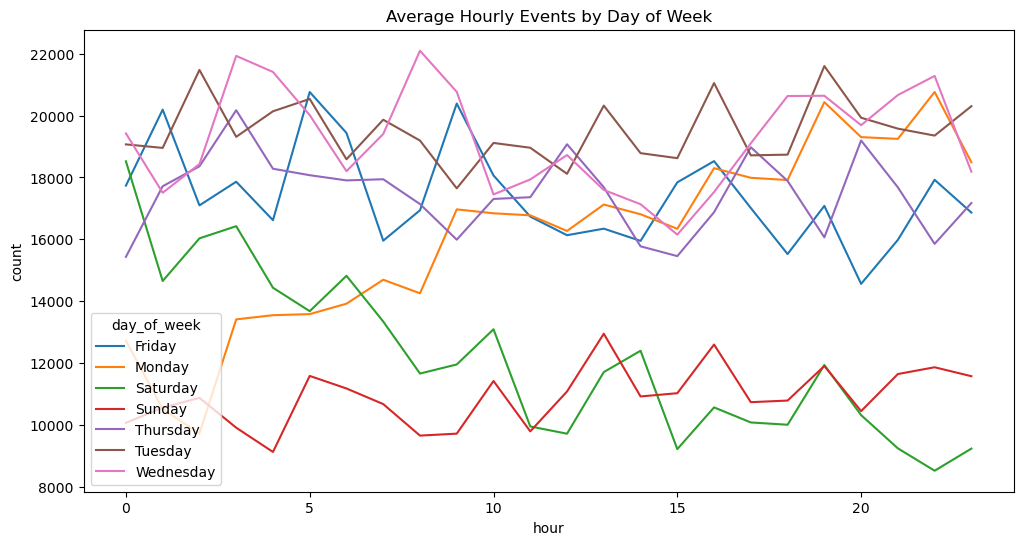

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

hourly_avg = df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_avg, x='hour', y='count', hue='day_of_week')
plt.title('Average Hourly Events by Day of Week')
plt.show()

#### What Your Patterns Suggest:
- Monday starts slow, then ramps up: People ease into their workweek. Maybe checking emails, planning, then more active later on.

- Saturday starts high, then declines: Users engage more in the morning (maybe leisure browsing/shopping), then wind down as the day progresses.

- Sunday consistently low: Could be a “rest day” effect where people are less engaged overall.

